# Chapter.5 Multi-variate Linear Regression

## Programming Assignment.5-03 GDM with Contour Plots

PA5_02에서 Contour Plot으로 그렸던 loss function에 대해서 GDM를 적용할 것입니다
<br>Data Sample에 대해서 $\theta_{2},\theta_{1}, \theta_{0}$ 이 update될때 어떠한 모습으로 학습되는지 확인할 것입니다

PA5_02에서 진행했던 것처럼 세 개의 $\theta$에 대해서 동시에 그릴수 없어서<br> 한 개씩 $\theta$를 고정시키고 GDM을 적용할 것입니다


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

우리의 모델에 대해서 Loss function을 계산하고 GDM을 적용할 것입니다 <br>
$\mathcal{L} = (y - (\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}))^{2}$ </li>
<br>각각의 $\theta$의 Loss에 대한 partial derivative는 다음과 같습니다
$$\frac{\partial \mathcal{L}}{\partial \theta_{2}} = -2x_{2}(y -\hat{y}), \quad
\frac{\partial \mathcal{L}}{\partial \theta_{1}} = -2x_{1}(y -\hat{y}), \quad
\frac{\partial \mathcal{L}}{\partial \theta_{0}} = -2(y -\hat{y})$$

따라서 $\theta_{2}, \theta_{1}, \theta_{0}$에 대한 GDM formula는 다음과 같습니다.
$$\theta_{2} := \theta_{2} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{2}}$$
$$\theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{1}}$$
$$\theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{0}}$$

다음과 같은 식에서 데이터셋이 만들어집니다
$$y =7x_{2} -  3x_{1} + 6$$ 
먼저 $\theta_{2}$를 고정시키고 $\theta_{1}$ 와 $\theta_{0}$를 통해서 진행합니다
<br> 데이터셋은 한개의 샘플 {((1,2),7)} 로 가정을 한다면
모델은 다음과 같이 만들어 집니다
$$\hat{y} =7x_{2} +  \theta_{1}x_{1} + \theta_{0}$$

Text(0, 0.5, '$\\theta_{0}$')

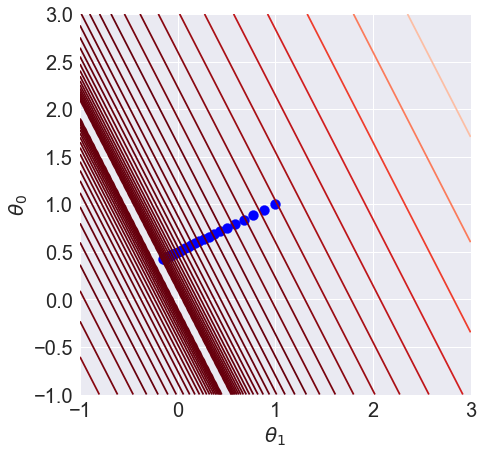

In [3]:
##### Start Your Code(Learning Preparation) #####
x2 = 1
x1 = 2
y = 7

th2, th1, th0 = 1.0, 1.0, 1.0
lr = 0.01
iterations = 30
##### End Your Code(Learning Preparation) #####
th2_list, th1_list, th0_list = [th2], [th1], [th0]
th2_range = np.linspace(-1, 3, 100)
th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(-1, 3, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = np.power(y - (7*x2 + Th1*x1 + Th0), 2)
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Prediction Calculation) #####
    pred = 7*x2 + th1*x1 + th0
    ##### Start Your Code(Prediction Calculation) #####
    
    
    ##### Start Your Code(Partial Derivatives) #####
    dth2 = -2*x2*(y - pred)
    dth1 = -2*x1*(y - pred)
    dth0 = -2*(y - pred)
    ##### End Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th2 = th2 - lr*dth2
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    th2_list.append(th2)
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

$\theta_{1}$를 고정시키고 $\theta_{2}$ 와 $\theta_{0}$를 통해서 진행합니다
모델은 다음과 같이 만들어 집니다
$$\hat{y} =\theta_{2}x_{2} -  3x_{1} + \theta_{0}$$
Data Sample 또한 이전과 같이 {((1,2),7)}로 진행합니다

Text(0, 0.5, '$\\theta_{0}$')

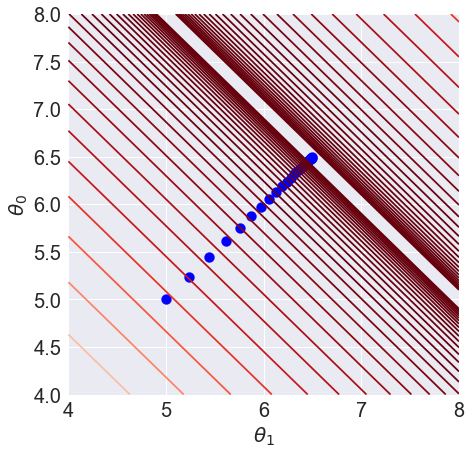

In [22]:
##### Start Your Code(Learning Preparation) ##### 
x2 = 1
x1 = 2
y = 7

th2, th1, th0 = 5.0, 5.0, 5.0
lr = 0.04
iterations = 30
##### End Your Code(Learning Preparation) #####
th2_list, th1_list, th0_list = [th2], [th1], [th0]
th2_range = np.linspace(4, 8, 100)
th1_range = np.linspace(3, 7, 100)
th0_range = np.linspace(4, 8, 100)
Th2, Th0 = np.meshgrid(th2_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = np.power(y - (Th2*x2 - 3*x1 + Th0), 2)
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Prediction Calculation) #####
    pred = th2*x2 - 3*x1 + th0
    ##### Start Your Code(Prediction Calculation) #####
    
    
    ##### Start Your Code(Partial Derivatives) #####
    dth2 = -2*x2*(y - pred)
    dth1 = -2*x1*(y - pred)
    dth0 = -2*(y - pred)
    ##### End Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th2 = th2 - lr*dth2
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    th2_list.append(th2)
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th2, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th2_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{2}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

$\theta_{0}$를 고정시키고 $\theta_{2}$ 와 $\theta_{1}$를 통해서 진행합니다
모델은 다음과 같이 만들어 집니다
$$\hat{y} =\theta_{2}x_{2} +  \theta_{1}x_{1} + 6$$
Data Sample 또한 이전과 같이 {((1,2),7)}로 진행합니다

Text(0, 0.5, '$\\theta_{1}$')

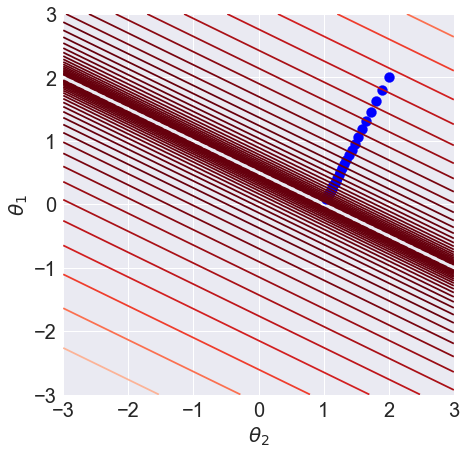

In [28]:
##### Start Your Code(Learning Preparation) ##### 
x2 = 1
x1 = 2
y = 7

th2, th1, th0 = 2.0, 2.0, 2.0
lr = 0.01
iterations = 30
##### End Your Code(Learning Preparation) #####
th2_list, th1_list, th0_list = [th2], [th1], [th0]
th2_range = np.linspace(-3, 3, 100)
th1_range = np.linspace(-3, 3, 100)
th0_range = np.linspace(-5, 3, 100)
Th2, Th1 = np.meshgrid(th2_range, th1_range)

##### Start Your Code(Loss Function) #####
loss = np.power(y - (Th2*x2 + Th1*x1 + 6), 2)
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Prediction Calculation) #####
    pred = th2*x2 + th1*x1 + 6
    ##### Start Your Code(Prediction Calculation) #####
    
    
    ##### Start Your Code(Partial Derivatives) #####
    dth2 = -2*x2*(y - pred)
    dth1 = -2*x1*(y - pred)
    dth0 = -2*(y - pred)
    ##### End Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th2 = th2 - lr*dth2
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    th2_list.append(th2)
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th2, Th1, loss, levels = levels, cmap = cmap)
ax.scatter(th2_list, th1_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{2}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{1}$', fontsize = 20)